In [113]:
!pip install pandas-datareader
!pip install yfinance
!pip install matplotlib
!pip install seaborn
!pip install mplfinance
!pip install sklearn

In [1]:
import pandas_datareader as prd
import pandas_datareader.data as web
import yfinance as yf
import numpy as npy
import matplotlib.pyplot as myplt
import seaborn as sns
import mplfinance as shibfinance
import pandas as pnd

In [3]:
yf.pdr_override()

data = web.get_data_yahoo("SHIB-USD", start="2022-02-15", end="2023-02-15")

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-15,0.00003,0.000032,0.00003,0.000031,0.000031,1602354887


In [4]:
year = data
year.index.name = 'Date'
year.shape
year.head(3)
year.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-12,0.000013,0.000013,0.000013,0.000013,0.000013,342923413
2023-02-13,0.000013,0.000013,0.000012,0.000012,0.000012,352766094
2023-02-14,0.000012,0.000013,0.000012,0.000013,0.000013,320847282


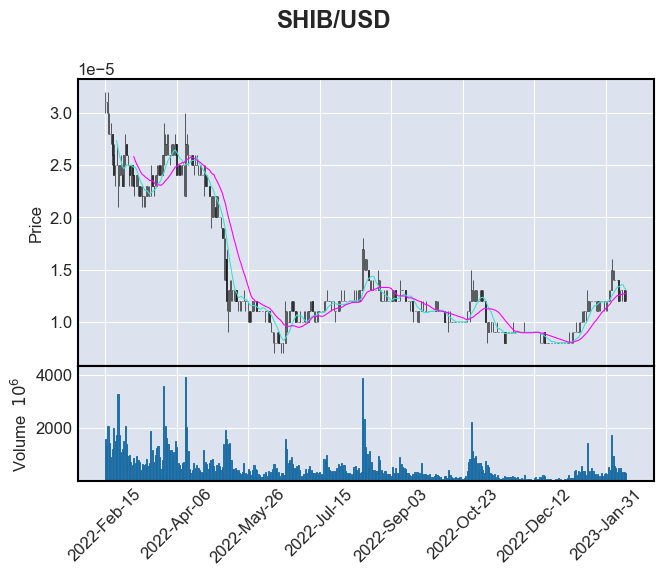

In [5]:
shibfinance.plot(year,type='candle',mav=(9,21),volume=True, title='SHIB/USD')

In [6]:
print("Porcentagem de Volume financeiro nulo: %.2f%%" % (data.Volume[data.Volume==0].count()/data.Volume.count()*100))

Porcentagem de Volume financeiro nulo: 0.00%


In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,0.000014,0.000014,0.000014,0.000014,0.000014,5.650175e+08
std,0.000006,0.000006,0.000006,0.000006,0.000006,5.468227e+08
min,0.000008,0.000008,0.000007,0.000008,0.000008,4.453381e+07
25%,0.000010,0.000010,0.000010,0.000010,0.000010,2.401250e+08
50%,0.000012,0.000012,0.000011,0.000012,0.000012,4.005490e+08
75%,0.000014,0.000015,0.000014,0.000014,0.000014,6.838071e+08
max,0.000031,0.000032,0.000030,0.000031,0.000031,3.927624e+09


In [8]:
data.index.duplicated().sum()

0

<Axes: >

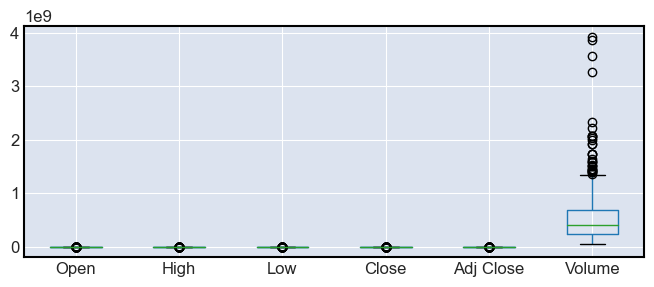

In [9]:
data.boxplot(figsize=(8,3))

<Axes: >

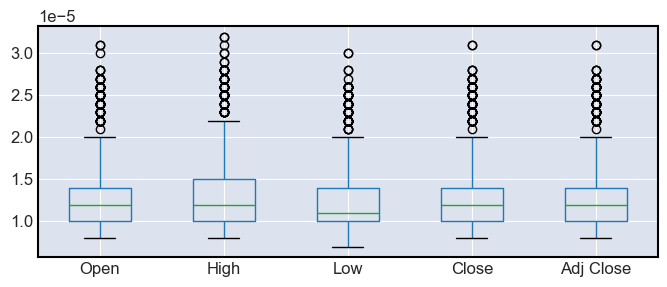

In [10]:
data.drop('Volume', axis=1).boxplot(figsize=(8,3))

<Axes: xlabel='Date'>

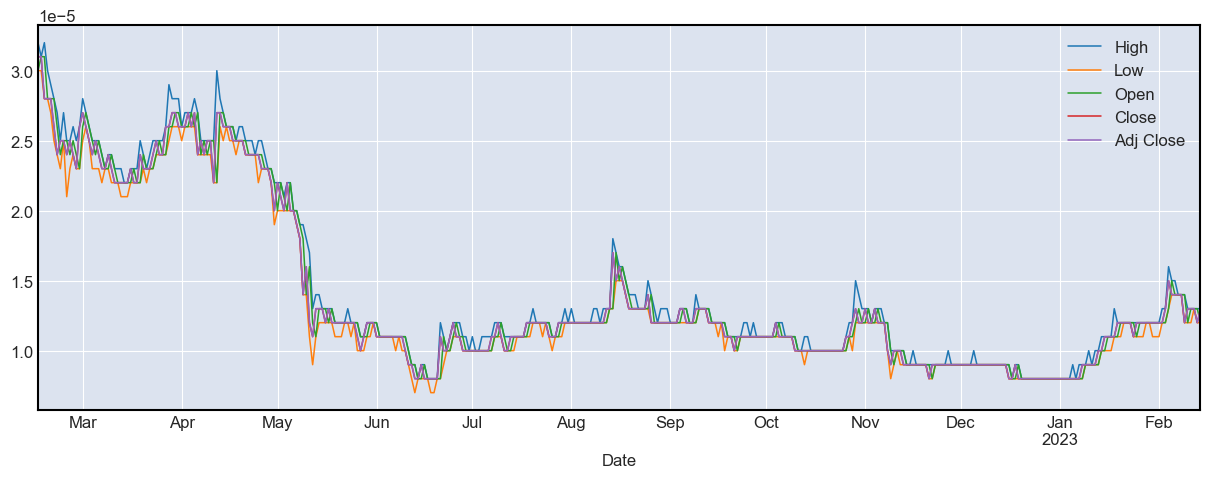

In [11]:
data[['High', 'Low', 'Open', 'Close', 'Adj Close']].plot.line(figsize=(15,5), linewidth=1.1)

In [13]:
#Novas informações para possíveis tratamentos
data['ns'] = range(0,len(data['Open']))         #Número sequencial.
data['reOpenClose'] = data.Close-data.Open      #Valor da diferença entre o valor de abertura e fechamento.
data['reHighLow'] = data.High-data.Low          #Valor da diferença entre o valor da máxima e mínima diária.
data['m9'] = data.Close.rolling(9).mean()       #Valor da média de 9 períodos do fechamento.
data['m21'] = data.Close.rolling(21).mean()     #Valor da média de 21 períodos do fechamento.
data['closingBigm9'] = (data.Close > data.m9)   #Valor de fechamento maior que a média de 9 períodos.
data['closingBigm21'] = (data.Close > data.m21) #Valor de fechamento maior que a média de 21 períodos.
data['m9Bigm21'] = (data.m9 > data.m21)         #Valor da média de 9 períodos é maior do que a de 21 períodos.
data['tend10'] = npy.array(data.Close.rolling(9).corr(data.ns))    #Valor da tendência atual para o período de 9 dias.
data['tend21'] = npy.array(data.Close.rolling(21).corr(data.ns))   #Valor da tendência atual para o período de 21 dias.
data['tend40'] = npy.array(data.Close.rolling(40).corr(data.ns))   #Valor da tendência atual para o período de 40 dias.
data['tend60'] = npy.array(data.Close.rolling(60).corr(data.ns))   #Valor da tendência atual para o período de 60 dias.
data['tend90'] = npy.array(data.Close.rolling(90).corr(data.ns))   #Valor da tendência atual para o período de 90 dias.
data['tend180'] = npy.array(data.Close.rolling(180).corr(data.ns)) #Valor da tendência atual para o período de 180 dias.
for i in range (0, 90):
    data['relationMax_' + str(i)] = data.Close - data.High.shift(periods=i)
    data['relationClose_' + str(i)] = data.Close - data.Close.shift(periods=i)

In [14]:
data[['Close', 'High','relationMax_10']].head()

,Close,High,relationMax_10
Date,,,
2022-02-15,0.000031,0.000032,NaN
2022-02-16,0.000031,0.000031,NaN
2022-02-17,0.000028,0.000032,NaN
2022-02-18,0.000028,0.000030,NaN
2022-02-19,0.000028,0.000029,NaN


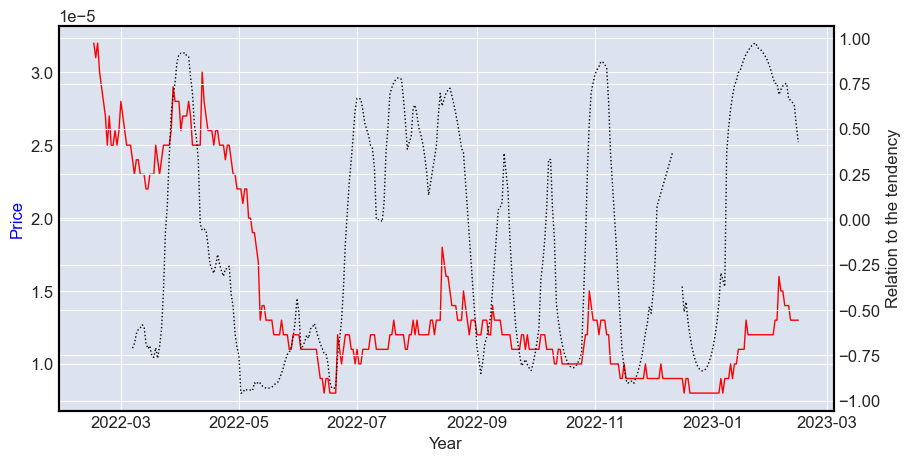

In [15]:
pic, ax1 = myplt.subplots(figsize = (10,5))
ax2 = ax1.twinx()
ax1.plot(data['High'], 'r', linewidth = 1)
ax2.plot(data['tend21'], color = '#000000', ls = ':', linewidth = 1)

ax1.set_xlabel('Year')
ax1.set_ylabel('Price', color = 'b')
ax2.set_ylabel("Relation to the tendency")

myplt.show()

In [16]:
#Calculadora de porcentagem de crescimento do valor da moeda.
x = float(0.000000001009)
percent = 100
y = float(0.00001323)
z = (percent*y)/x
print('Total de crescimento: %2f%%' % + z)

Total de crescimento: 1311199.207136%


In [17]:

class NClass(): pass
crit = NClass()
crit.DaysAhead = 30
crit.sec = 0.15

In [18]:
#Criação da nossa variavel de objetivo, nomeando ela como mark.
mark = npy.array(range(0,len(data.index)))
i = 0
for indexData in data.index:
    mark[i] = 0
    count = 1
    while count <= crit.DaysAhead:
        i2 = i + count
        if i2 >= len(data.index): break
        if data.iloc[i2]['High']/data.iloc[i]['Close'] >= 1+crit.sec: mark[i] = 1
        count += 1
    i += 1
    
data['mark'] = mark

In [19]:
data.sample(20)

,Open,High,Low,Close,Adj Close,Volume,ns,reOpenClose,reHighLow,m9,...,relationClose_85,relationMax_86,relationClose_86,relationMax_87,relationClose_87,relationMax_88,relationClose_88,relationMax_89,relationClose_89,mark
Date,,,,,,,,,,,,,,,,,,,,,
2022-03-06,0.000025,0.000025,0.000023,0.000024,0.000024,639453988,19,-9.999985e-07,1.999999e-06,0.000025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2022-09-18,0.000012,0.000012,0.000010,0.000011,0.000011,277027590,215,-1.000000e-06,2.000001e-06,0.000012,...,-0.000001,0.000000e+00,0.000000e+00,1.000000e-06,0.000001,0.000000e+00,0.000001,-1.000000e-06,0.000000e+00,0
2022-05-04,0.000020,0.000022,0.000020,0.000022,0.000022,636180875,78,2.000001e-06,2.000001e-06,0.000022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-01,0.000026,0.000028,0.000025,0.000027,0.000027,2075874028,14,1.000000e-06,3.000001e-06,0.000025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-10-02,0.000011,0.000011,0.000011,0.000011,0.000011,176957004,229,0.000000e+00,0.000000e+00,0.000011,...,-0.000001,-1.000000e-06,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000001,0.000000e+00,1.000000e-06,1
2022-09-19,0.000011,0.000011,0.000011,0.000011,0.000011,346595419,216,0.000000e+00,0.000000e+00,0.000012,...,0.000000,-1.000000e-06,-1.000000e-06,0.000000e+00,0.000000,1.000000e-06,0.000001,0.000000e+00,1.000000e-06,0
2023-02-01,0.000012,0.000012,0.000011,0.000012,0.000012,300740434,351,0.000000e+00,1.000000e-06,0.000012,...,0.000002,0.000000e+00,0.000000e+00,-9.999994e-07,0.000000,-9.999994e-07,0.000000,-9.999994e-07,-9.999994e-07,1
2022-06-07,0.000011,0.000011,0.000010,0.000011,0.000011,344739034,112,0.000000e+00,1.000000e-06,0.000011,...,-0.000011,-1.200000e-05,-1.100000e-05,-1.200000e-05,-0.000011,-1.200000e-05,-0.000011,-1.300000e-05,-1.200000e-05,0
2022-06-17,0.000008,0.000008,0.000008,0.000008,0.000008,210833181,122,0.000000e+00,0.000000e+00,0.000009,...,-0.000017,-1.700000e-05,-1.600000e-05,-1.600000e-05,-0.000015,-1.500000e-05,-0.000015,-1.600000e-05,-1.500000e-05,1


<Axes: >

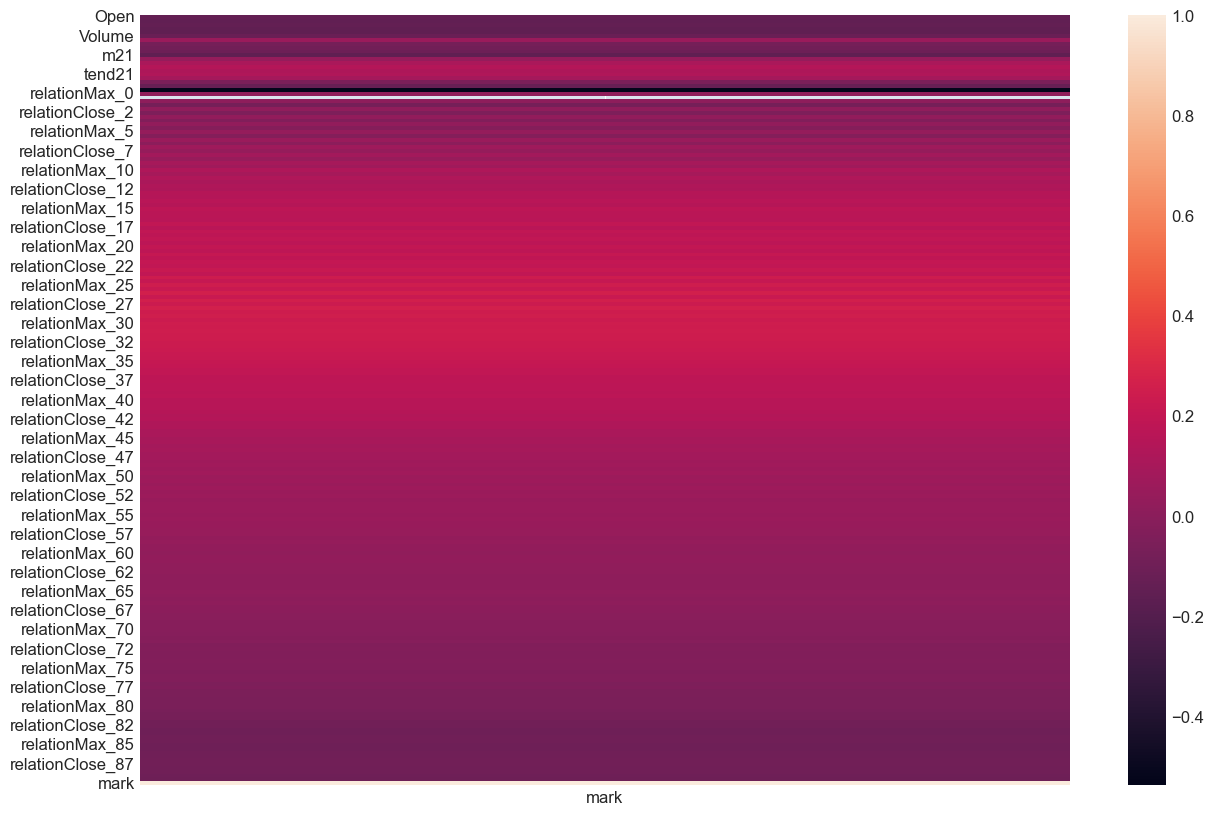

In [20]:
tendency_new = data.corr(method='pearson', min_periods=0.0000001)[['mark']]
myplt.figure(figsize=(15,10))
sns.heatmap(tendency_new)

C:\Users\ernan\AppData\Local\Temp\ipykernel_15980\1051986927.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.reHighLow[data.mark==1])
C:\Users\ernan\AppData\Local\Temp\ipykernel_15980\1051986927.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.reHighLow[data.mark==0])
C:\Users\e

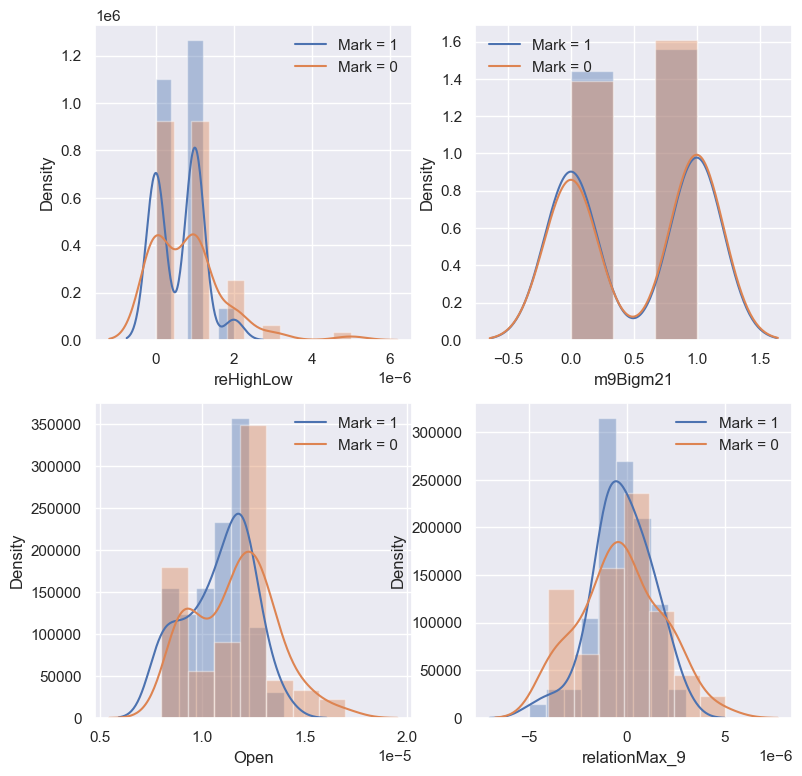

In [24]:
myplt.figure(figsize=(9,9))
sns.set(font_scale=1)

first_plot = myplt.subplot(2,2,1)
sns.distplot(data.reHighLow[data.mark==1])
sns.distplot(data.reHighLow[data.mark==0])
first_plot.legend(['Mark = 1', 'Mark = 0'])

second_plot = myplt.subplot(2,2,2)
sns.distplot(data.m9Bigm21[data.mark==1])
sns.distplot(data.m9Bigm21[data.mark==0])
second_plot.legend(['Mark = 1', 'Mark = 0'])

third_plot = myplt.subplot(2,2,3)
sns.distplot(data.Open[data.mark==1])
sns.distplot(data.Open[data.mark==0])
third_plot.legend(['Mark = 1', 'Mark = 0'])

fourth_plot = myplt.subplot(2,2,4)
sns.distplot(data.relationMax_9[data.mark==1])
sns.distplot(data.relationMax_9[data.mark==0])
fourth_plot.legend(['Mark = 1', 'Mark = 0'])

In [25]:
pnd.DataFrame({'Values NaN': data.isna().sum()})

,Values NaN
Open,0
High,0
Low,0
Close,0
Adj Close,0
...,...
relationMax_88,0
relationClose_88,0
relationMax_89,0
relationClose_89,0


In [23]:
data = data.dropna()

In [26]:
frq = pnd.DataFrame(columns=['metricas', '0', '1'])
frq = frq.append({'metricas' : 'mark', '0': data.mark[data.mark==0].count(),
                  '1' : data.mark[data.mark==1].count()}, 
                 ignore_index=True)
prob_frq = frq[frq.metricas=='mark']['1'].values/npy.sum(frq[frq.metricas=='mark'][['0','1']].values)

print(frq)
print('Frequência do mark: %.2f%%' % (100*prob_frq))

  metricas   0   1
0     mark  69  75
Frequência do mark: 52.08%


C:\Users\ernan\AppData\Local\Temp\ipykernel_15980\1067343309.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frq = frq.append({'metricas' : 'mark', '0': data.mark[data.mark==0].count(),


In [31]:
#Importando o sklearn para iniciar o projeto de Machine Learning
#Criando as variáveis de entrada, saída e testes.
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, confusion_matrix, auc

Main_dataFrame = data.dropna()
for i in data.columns: Main_dataFrame[i] = Main_dataFrame[i].astype(float)
y = Main_dataFrame.mark #
X = Main_dataFrame.drop(['mark'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_new = Main_dataFrame.drop(['mark'], axis=1).tail(1)
for i in X_new.columns: X_new[i] = X_new[i].astype(float)

In [32]:
X_new

,Open,High,Low,Close,Adj Close,Volume,ns,reOpenClose,reHighLow,m9,...,relationMax_85,relationClose_85,relationMax_86,relationClose_86,relationMax_87,relationClose_87,relationMax_88,relationClose_88,relationMax_89,relationClose_89
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-14,0.000012,0.000013,0.000012,0.000013,0.000013,320847282.0,364.0,9.999994e-07,9.999994e-07,0.000013,...,0.000004,0.000005,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004,0.000004
